In [1]:
#import packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option ("display.max_rows", 99)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import plotly.express as pltx
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
24583,25628,2/24/2013,2/24/2013,Male,4,zhanjiang,guangdong,CN,50.0,3/31/2014,10,8655,1755.0,8443.0,13695,9/29/2013,185,24.111111,117,0,0.710786,8655,0
18571,46533,11/5/2010,12/24/2010,Male,4,zhengzhou,henan,CN,46.0,3/31/2014,20,12126,8522.0,3043.0,17759,1/19/2014,73,33.368421,161,0,0.742375,12126,0
61164,42028,2/23/2012,2/26/2012,Male,4,guangzhou,guangdong,CN,42.0,3/31/2014,2,634,819.0,0.0,1586,9/15/2012,564,6.000000,6,0,0.659458,634,0
3048,6163,12/15/2011,12/16/2011,Male,4,guangzhou,guangdong,CN,39.0,3/31/2014,25,43446,14695.0,14739.0,55977,3/4/2014,28,29.083333,140,0,0.777794,43446,0
5355,11101,4/1/2005,4/21/2005,Male,4,huizhou,guangdong,CN,37.0,3/31/2014,32,26869,20015.0,9499.0,50083,3/7/2014,25,22.032258,97,0,0.654449,26869,0


##Definisi masing-masing kolom diatas adalah sebagai berikut:##

* MEMBER_NO: ID Member
* FFP_DATE : Frequent Flyer Program Join Date
* FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
* GENDER : Jenis Kelamin
* FFP_TIER : Tier dari Frequent Flyer Program
* WORK_CITY : Kota Asal
* WORK_PROVINCE : Provinsi Asal
* WORK_COUNTRY : Negara Asal
* AGE : Umur Customer
* LOAD_TIME : Tanggal data diambil
* FLIGHT_COUNT : Jumlah penerbangan Customer
* BP_SUM : Rencana Perjalanan
* SUM_YR_1 : Fare Revenue
* SUM_YR_2 : Votes Prices
* SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
* LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
* LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
* AVG_INTERVAL : Rata-rata jarak waktu
* MAX_INTERVAL : Maksimal jarak waktu
* EXCHANGE_COUNT : Jumlah penukaran
* avg_discount : Rata rata discount yang didapat customer
* Points_Sum : Jumlah poin yang didapat customer
* Point_NotFlight : point yang tidak digunakan oleh members

#**EDA**

##1. Descriptive Statistics##

Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

In [3]:
# Untuk melihat shape pada dataset
df.shape

(62988, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
# melakukan konsistensi nama kolom agar memiliki lower case yang sama
for i in df.columns:
    lower = i.lower()
    df.rename(columns={i: lower}, inplace=True)


In [ ]:
df.head(1)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

In [5]:
import datetime as dt
df['ffp_date'] = df['ffp_date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))
df['first_flight_date'] = df['first_flight_date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))
df['load_time'] = df['load_time'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))
df.head(1)

#last_flight_date ada beberapa baris yang eror dikarenakan --> time data '2014/2/29  0:00:00' does not match format '%m/%d/%Y', jadi tidak ikut diolah

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50


Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

In [6]:
num = df.select_dtypes(include=['int64','float64']).columns.tolist()
print (num)

['member_no', 'ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum', 'point_notflight']


In [7]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
print (categorical)

['gender', 'work_city', 'work_province', 'work_country', 'last_flight_date']


In [8]:
#range kolom numerikal
df[num].describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [9]:
#range kolom kategorikal
df[categorical].describe()

,gender,work_city,work_province,work_country,last_flight_date
count,62985,60719,59740,62962,62988
unique,2,3234,1165,118,731
top,Male,guangzhou,guangdong,CN,3/31/2014
freq,48134,9386,17509,57748,959


In [10]:
df.isna().sum()


member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [11]:
#Persentasi data null
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,work_province,3248,5.157
1,work_city,2269,3.602
2,sum_yr_1,551,0.875
3,age,420,0.667
4,sum_yr_2,138,0.219
5,work_country,26,0.041
6,gender,3,0.005


## Summary Descriptive Statistics ##

- Dataset ini memiliki kolom 23 kolom dengan row sebanyak 62988
- Ada beberapa kolom yang tipe datanya tidak sesuai seperti `ffp_date`, `first_flight_date`, `load_time` dan sudah diubah
- Berdasarkan hasil pada function df.describe() untuk kolom numerical dan categorical, dapat dilihat pada kolom `bp_sum`, `sum_yr_1`, `sum_yr_2`, `seg_km_sum`, dan `points_sum` memiliki nilai mean dan median yang selisihnya cukup besar sehingga kemungkinan distribusi menceng (skew)
- Kolom `avg_discount` memiliki nilai yang tidak valid yaitu 1,5 karena diskon max 100% atau 1
- Kolom `last_flight_date` memiliki nilai yang tidak valid yaitu tanggal 29 Februari 2014 yang mana tanggal terakhir Februari 2014 adalah ditanggal 28
- Ada banyak kolom yang memiliki nilai null
- Untuk kolom-kolom dengan tipe data kategorikal seperti `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, dan `GENDER` diputuskan akan membuang kolom tersebut karena tidak akan digunakan dalam algoritma clustering. Sedangkan untuk kolom `SUM_YR_1`, `SUM_YR_2`, `AGE` akan dicek terlebih dahulu bentuk distribusinya sebelum memutuskan mengganti nilai NULL dengan mean/median

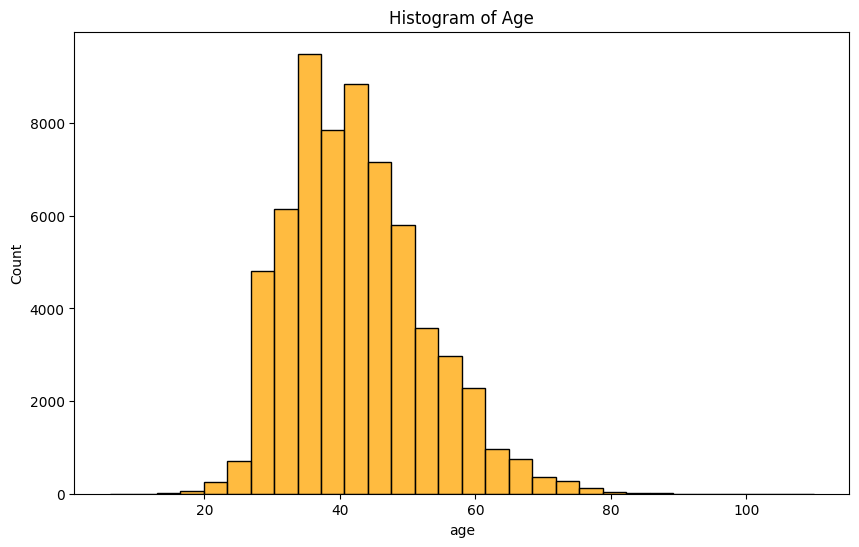

In [12]:
# Untuk melihat visualisasi persebaran umur
var = df['age']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Age')
plt.show()

In [13]:
# get min and max age
min_age = var.min()
max_age = var.max()

# print range of age
print(f'The range of age is {min_age} to {max_age}.')

The range of age is 6.0 to 110.0.


Variabel usia menunjukkan bahwa rata-rata usia customer adalah 42 tahun. Rentang usianya adalah 6-110 tahun. Dari kuartil yang ada dan diagram di atas yang menceng kanan, dapat dilihat bahwa kebanyakan customer ada di usia produktif, yakni antara 25-60 tahun. Ini mungkin karena orang-orang dalam kelompok usia ini lebih mungkin bepergian menggunakan pesawat dalam melakukan aktifitasnya, dan mampu secara finansial untuk membeli tiket pesawat.

In [14]:
import plotly.express as px
df['fd1'] = df['ffp_date'].dt.strftime("%b")
day_order= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df_plot = df[['fd1','member_no']].groupby(['fd1']).count().reset_index()
df_plot = df_plot.set_index('fd1').loc[day_order].reset_index()

fig = px.bar(df_plot, x = 'fd1', y = 'member_no', title = 'Persebaran Bulan',labels={
                     "fd1": "Bulan",
                     "member_no": "Jumlah Customer"
                 })
fig.show()

In [15]:
df['fd1'] = df['ffp_date'].dt.strftime("%Y")
day_order= ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']

df_plot = df[['fd1','member_no']].groupby(['fd1']).count().reset_index()
df_plot = df_plot.set_index('fd1').loc[day_order].reset_index()

fig = px.line(df_plot, x = 'fd1', y = 'member_no', title = 'Persebaran Tahun',labels={
                     "fd1": "Tahun",
                     "member_no": "Jumlah Customer"
                 })

fig.show()

In [16]:
df['beda'] = (df['first_flight_date']-df['ffp_date']).dt.days

df.beda.describe()

count    62988.000000
mean       178.750651
std        453.575892
min     -38409.000000
25%          0.000000
50%         14.000000
75%        143.000000
max       3308.000000
Name: beda, dtype: float64

Variabel `ffp_date` menunjukkan bahwa customer mulai bergabung dalam program loyalitas maskapai Maret, November, dan Januari. Hal ini inline dengan masa liburan sekolah maupun hari libur nasional, yang ada di sekitar bulan-bulan tersebut. Kemungkinan customer bergabung dalam program sebelum memesan tiket liburan agar mendapatkan voucher/diskon yang ditawarkan perusahaan. Dengan membeli tiket pesawat setelah bergabung dengan program, customer juga memperoleh poin yang nantinya dapat ditukarkan untuk perjalanan udara secara gratis, untuk barang atau jasa lainnya, atau untuk peningkatan manfaat, seperti upgrade kelas perjalanan, akses ruang tunggu bandar udara, atau prioritas pemesanan.

Dari diagram di atas, pemesanan tiket oleh customer dilakukan sekitar sebulan sebelum libur natal dan berlanjut hingga akhir Januari. Tren customer yang bergabung dengan program loyalitas terus naik dari tahun 2004 sampai 2012, dan mengalami penurunan di akhir tahun perolehan data, yakni tahun 2013

Sedangkan dari variabel `beda`, kita juga dapat melihat bahwa rata-rata customer melakukan penerbangan pertama mereka 178 hari (6 bulan) setelah bergabung dengan program loyalitas maskapai. Artinya, pengguna tidak langsung memesan tiket perjalanan, tapi memang menunggu saat yang tepat untuk menggunakannya dengan tujuan untuk menambah keuntungan yang akan mereka peroleh saat membeli tiket pesawat.

In [17]:
df['fd1'] = df['work_country']

df_plot = df[['fd1','member_no']].groupby(['fd1']).count().reset_index()
df_plot = df_plot.set_index('fd1').reset_index()

fig = px.bar(df_plot, x = 'fd1', y = 'member_no', title = 'Persebaran Negara',labels={
                     "fd1": "Negara",
                     "member_no": "Jumlah Customer"
                 })
fig.show()

Responden yang ada dalam data kebanyakan berasal dari negara Cina

<Axes: ylabel='gender'>

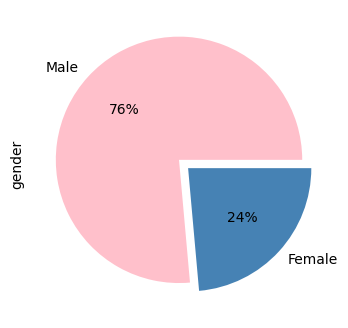

In [18]:
# Untuk melihat visualisasi Driving License
# get variable
colors = ['pink', 'steelblue']
explode = (0.05, 0.05)

df['gender'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

Diagram di atas terkait variabel `Gender` menunjukkan bahwa 76% member program loyalitas kebanyakan adalah pria. Ini berarti bahwa kebanyakan pria lebih tertarik untuk bergabung dalam program dibandingkan wanita.

Ada beberapa alasan mengapa pria lebih mungkin untuk bergabung. Pertama, pria lebih mungkin memiliki pekerjaan. Kondisi dunia saat ini, pria masih mendominasi dunia pekerjaan dibanding wanita, walaupun tidak dipungkiri jumlah pekerja wanita setiap tahun semakin bertambah. Kedua, saat ini kebanyakan pekerja yang menempati posisi tinggi di struktur perusahaan yang membutuhkan mereka untuk bepergian masih didominasi oleh pria. Ini berarti mereka lebih mungkin menggunakan jasa transportasi, salah satunya adalah maskapai penerbangan.

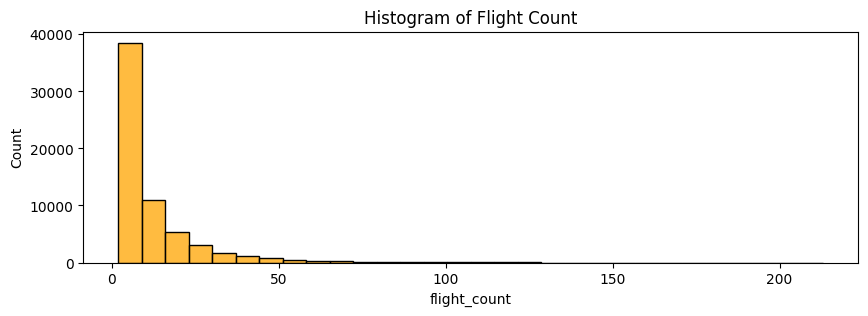

In [19]:
# Untuk melihat visualisasi persebaran umur
var = df['flight_count']

# plot histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Flight Count')
plt.show()


Distribusi dari variabel `Flight Count` menunjukkan bahwa rata-rata customer dalam data yang bergabung dengan program loyalitas melakukan penerbangan yang masih tergolong sedikit. Untuk detailnya yang didapatkan dengan run fungsi describe yang telah dilakukan sebelumnya, rata-rata penerbangan yang telah dilakukan berjumlah 11, dengan median nya sebesar 7.

Insight yang bisa didapat dari informasi tsb, bisa jadi marketing yang dilakukan kurang tepat sasaran. Hal ini dapat dilihat dari responden yang diambil secara acak berasal dari 10 tahun yang berbeda-beda, namun penerbangan yang dilakukan masih tergolong sedikit. Untuk jangka waktu 10 tahun, sesuai dengan nama program, seharusnya dapat menjaring customer yang memang melakukan perjalanan yang cukup banyak agar customer-customer "bernilai" tersebut dapat terus lebih memilih menggunakan pesawat dari maskapai tertentu dibanding maskapai lainnya dan perusahaan dapat mempertahankan revenue mereka.

Oleh karena itu, dapat ditinjau lagi dari sisi perusahaan bagaimana marketing sebaiknya dilakukan agar target marketing dapat lebih tepat sasaran ke pasar customer yang ingin dijangkau.

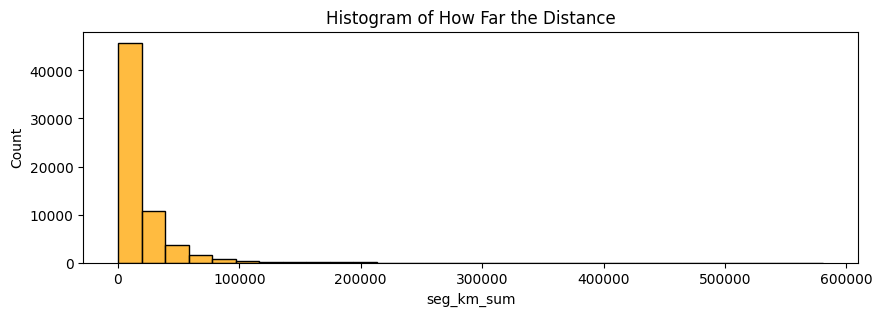

In [20]:
# Untuk melihat visualisasi persebaran Jarak
var = df['seg_km_sum']

# plot histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of How Far the Distance')
plt.show()


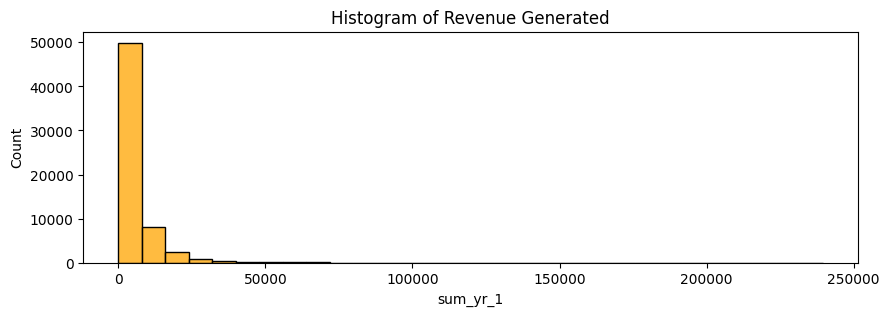

In [21]:
# Untuk melihat visualisasi persebaran revenue
var = df['sum_yr_1']

# plot histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Revenue Generated')
plt.show()


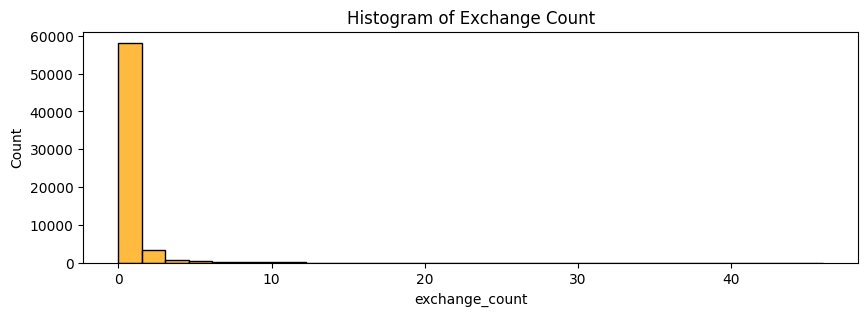

In [22]:
# Untuk melihat visualisasi persebaran jumlah penukaran
var = df['exchange_count']

# plot histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Exchange Count')
plt.show()


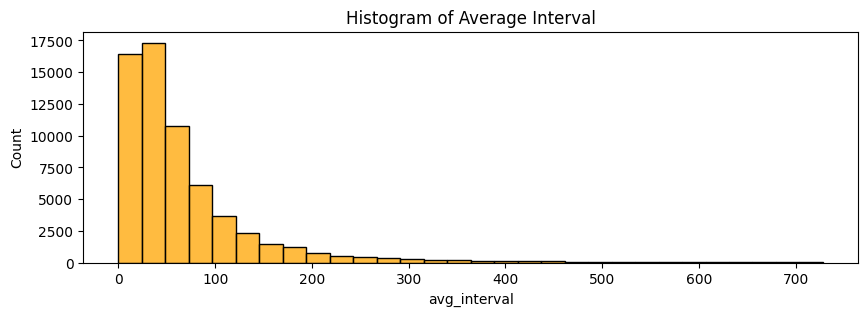

In [23]:
# Untuk melihat visualisasi persebaran jarak waktu
var = df['avg_interval']

# plot histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Average Interval')
plt.show()


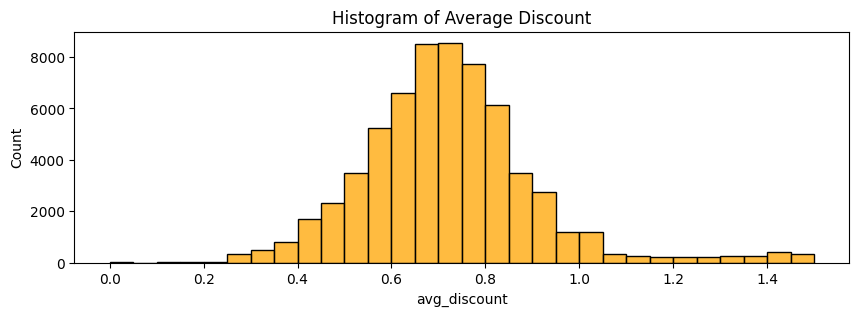

In [24]:
# Untuk melihat visualisasi persebaran diskon
var = df['avg_discount']

# plot histogram
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Average Discount')
plt.show()


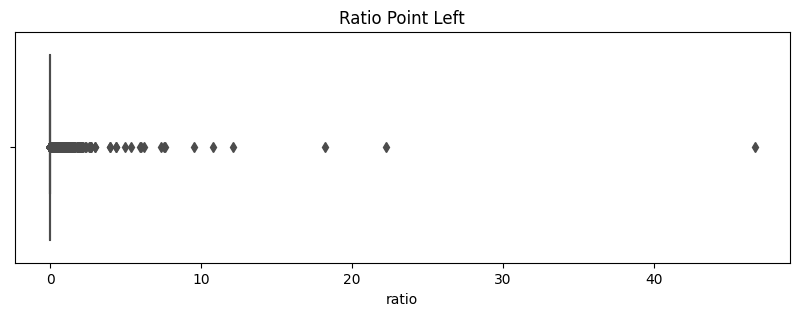

In [25]:
df['ratio'] = df['point_notflight']/df['points_sum']*100

# Untuk melihat visualisasi persebaran umur
var = df['ratio']

# plot histogram
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x=var, color='orange')
plt.title('Ratio Point Left')
plt.show()

Beberapa diagram di atas turut menunjang pernyataan bahwa marketing yang telah dilakukan oleh perusahaan masih belum tepat sasaran. Dapat dilihat dari kolom `seg_km_sum`, `sum_yr_1`, `exchange_count`, `avg_interval`, dan rasio poin yang belum ditukar, terlihat bahwa customer yang bergabung dengan program loyalitas bukan merupakan pelancong atau businessman untuk selalu menggunakan airlines. Kebanyakan merupakan customer biasa yang melakukan penerbangan hanya di waktu-waktu tertentu. Tercermin dari jarak perjalanan yang tidak terlalu jauh, revenue yang didapat perusahaan tidak terlalu besar, waktu penerbangan yang tidak tergolong lama, dan rasio penukaran poin di atas 50%.

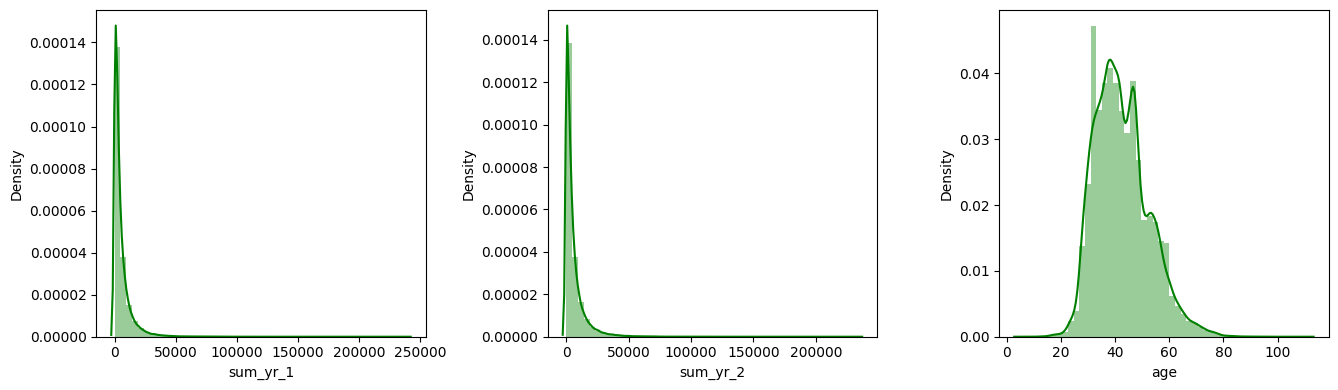

In [26]:
#Bentuk distribusi
cek_null = ['sum_yr_1','sum_yr_2', 'age']
plt.figure(figsize=(18, 4))
for i in range(len(cek_null)):
    plt.subplot(1,4,i+1)
    sns.distplot(df[cek_null[i]],color='g')
    plt.tight_layout()

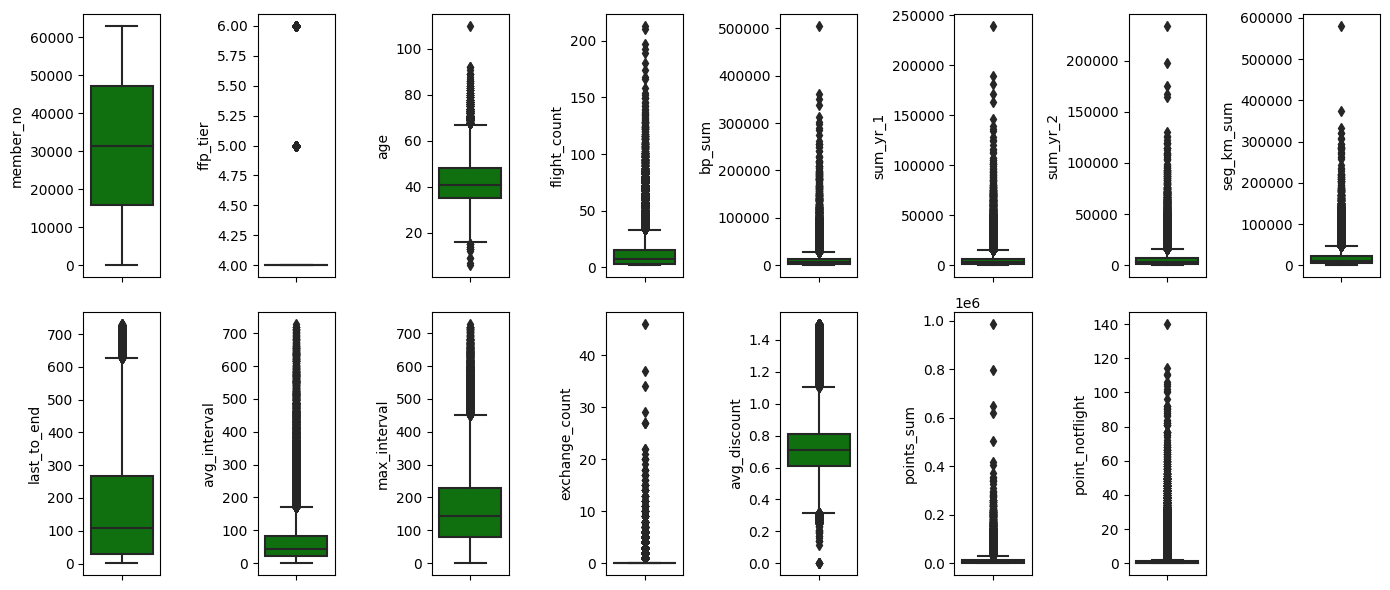

In [27]:
#Univariate
plt.figure(figsize = (14,6))
for i in range(len(num)):
    plt.subplot(math.ceil(len(num)/8),8,i+1)
    sns.boxplot(y=df[num[i]],color='g',orient='v')
    plt.tight_layout()

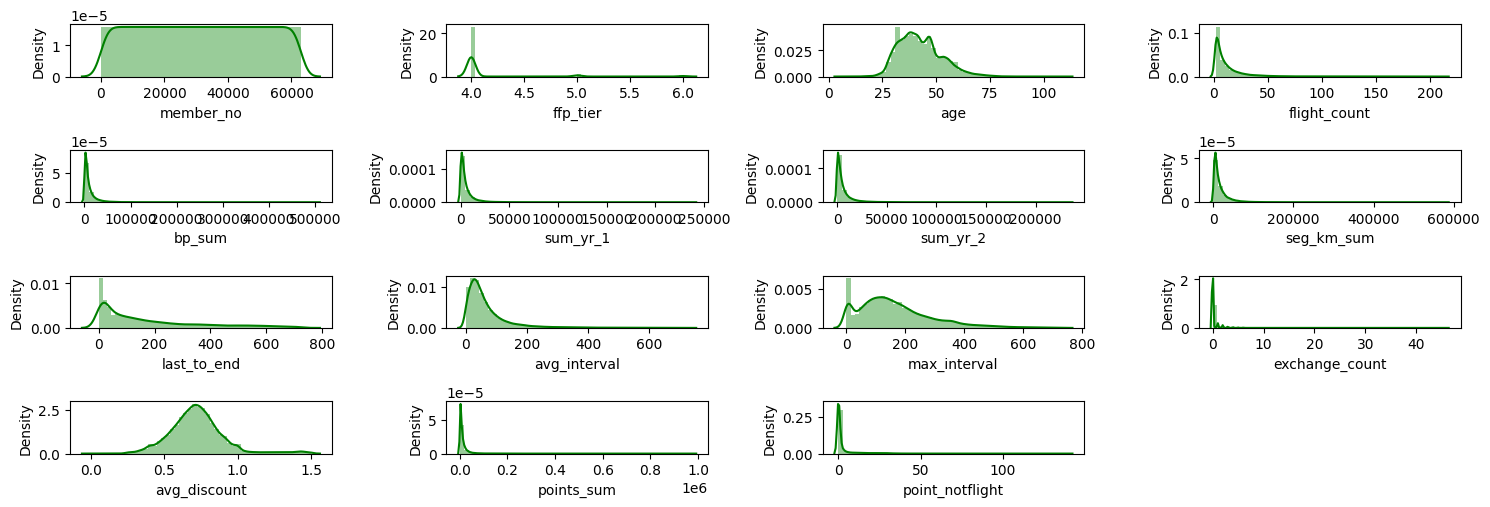

In [28]:
plt.figure(figsize = (15,6))
for i in range(len(num)):
    plt.subplot(math.ceil(len(num)/3),4,i+1)
    sns.distplot(df[num[i]],color='g')
    plt.tight_layout()

- Dapat dilihat bahwa beberapa fitur perlu dilakukan handling terhadap outlier, namun handling outlier sebaiknya dilakukan pada saat telah menentukan fitur apa saja yang akan digunakan agar lebih efisien. Jadi untuk sementara step handling outlier akan diskip terlebih dahulu.
- sementara dari fitur avg discount perlu dilakukan pemrosesan lebih lanjut pada feature engineering, karena memiliki nilai yang tidak valid yaitu 1,5 sedangkan diskon max adalah 1 atau 100%

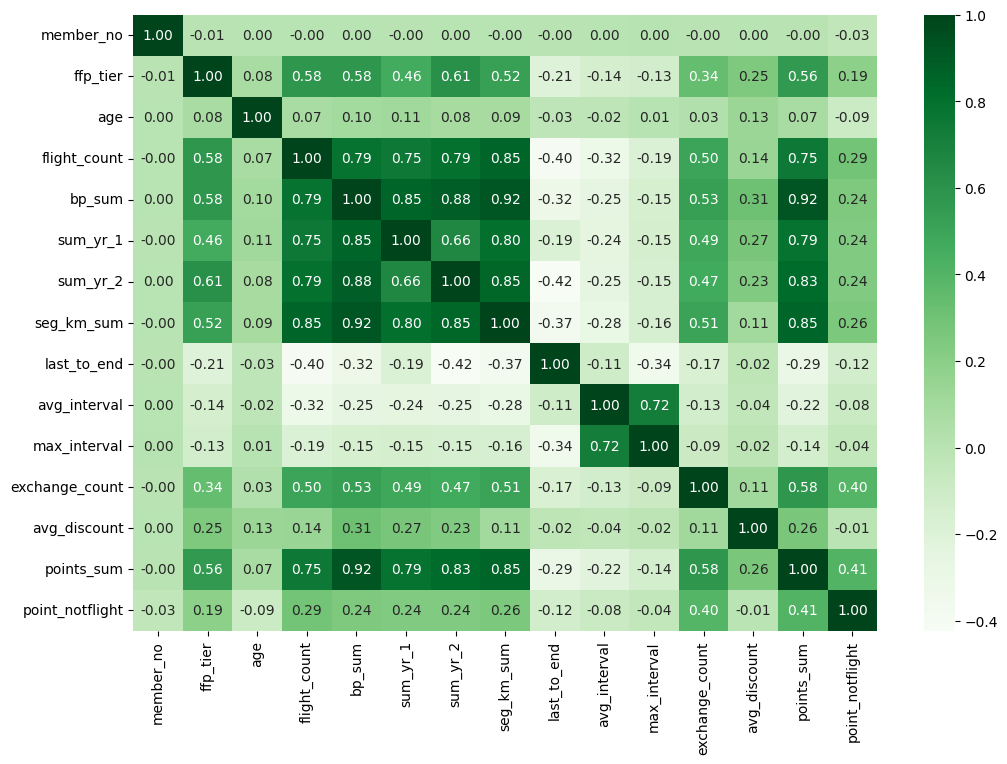

In [29]:
#Multivariate
plt.figure(figsize=(12, 8))
sns.heatmap(df[num].corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

Setelah melihat dari matriks korelasi dan melihat definisi dari setiap feature diputuskan akan membuang feature berikut ini karena dirasa tidak akan berguna dalam membentuk model clustering : `age`, `MEMBER_NO`, `Point_NotFlight`, `AVG_INTERVAL`, `MAX_INTERVAL`. Kemudian `FLIGHT_COUNT`,`BP_SUM`, `Points_Sum` ,`SEG_KM_SUM`, `SUM_YR_1`, `SUM_YR_2` merupakan feature yang redundan maka diputuskan hanya akan mengambil salah satunya yaitu `FLIGHT_COUNT` karena merupakan feature yang penting sehingga tidak dibuang.

# Data Cleansing

In [30]:
# HANDLE MISSING VALUE
# Bentuk Distribusi untuk kolom SUM_YR_1 & SUM_YR_2 --> Right Skewness
# Bentuk Distribusi kolom AGE --> Multimodal
# Mengganti semua nilai NULL pada ketiga kolom tersebut dengan Median
# kolom kategorikal seperti work city, work provience tidak akan di handle karena akan di drop
df['age'] = df['age'].fillna(df['age'].median())
df['sum_yr_1'] = df['sum_yr_1'].fillna(df['sum_yr_1'].median())
df['sum_yr_2'] = df['sum_yr_2'].fillna(df['sum_yr_2'].median())
df = df.drop(['work_city','work_province','work_country','gender'],axis=1)

In [31]:
df.isna().sum()

member_no              0
ffp_date               0
first_flight_date      0
ffp_tier               0
age                    0
load_time              0
flight_count           0
bp_sum                 0
sum_yr_1               0
sum_yr_2               0
seg_km_sum             0
last_flight_date       0
last_to_end            0
avg_interval           0
max_interval           0
exchange_count         0
avg_discount           0
points_sum             0
point_notflight        0
fd1                   26
beda                   0
ratio                419
dtype: int64

In [32]:
#Cek duplikat data
df.duplicated().sum()

0

In [33]:
# melakukan filtering terhadap nilai diskon yang lebih dari 100%
df = df[df.avg_discount <= 1]
df.avg_discount.value_counts()

1.000000    757
0.400000    413
0.800000    391
0.750000    370
0.700000    311
           ... 
0.852522      1
0.591181      1
0.738605      1
0.958669      1
0.716905      1
Name: avg_discount, Length: 51572, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          60041 non-null  int64         
 1   ffp_date           60041 non-null  datetime64[ns]
 2   first_flight_date  60041 non-null  datetime64[ns]
 3   ffp_tier           60041 non-null  int64         
 4   age                60041 non-null  float64       
 5   load_time          60041 non-null  datetime64[ns]
 6   flight_count       60041 non-null  int64         
 7   bp_sum             60041 non-null  int64         
 8   sum_yr_1           60041 non-null  float64       
 9   sum_yr_2           60041 non-null  float64       
 10  seg_km_sum         60041 non-null  int64         
 11  last_flight_date   60041 non-null  object        
 12  last_to_end        60041 non-null  int64         
 13  avg_interval       60041 non-null  float64       
 14  max_in

# 2. Feature Engineering

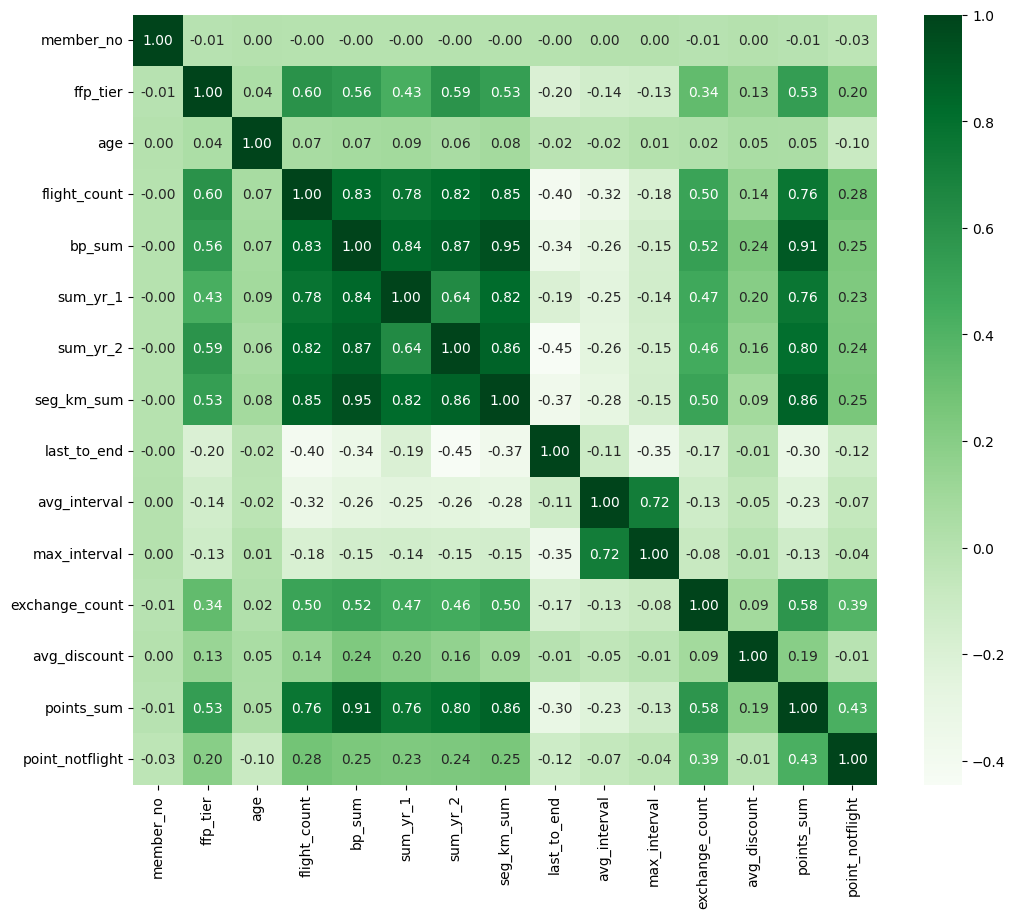

In [35]:
#Drop unecesary feature
plt.figure(figsize=(12, 10))
sns.heatmap(df[num].corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

Ketika ingin melakukan segmentasi kepada para pelanggan maskapai penerbangan feature2 yang penting digunakan adalah feature yang merepresentasikan aktivitas penerbangan dari pelanggan. Oleh sebab itu diputuskan bahwa feature yang penting yang akan dipakai untuk K-Means Clustering adalah sebagai berikut ini :
* FLIGHT_COUNT
* SEG_KM_SUM
* LAST_TO_END
* avg discount

# Feature Selection

In [36]:
# memilih fitur yang berkolasi kuat
df=df[["flight_count","seg_km_sum", "last_to_end", "avg_discount"]]

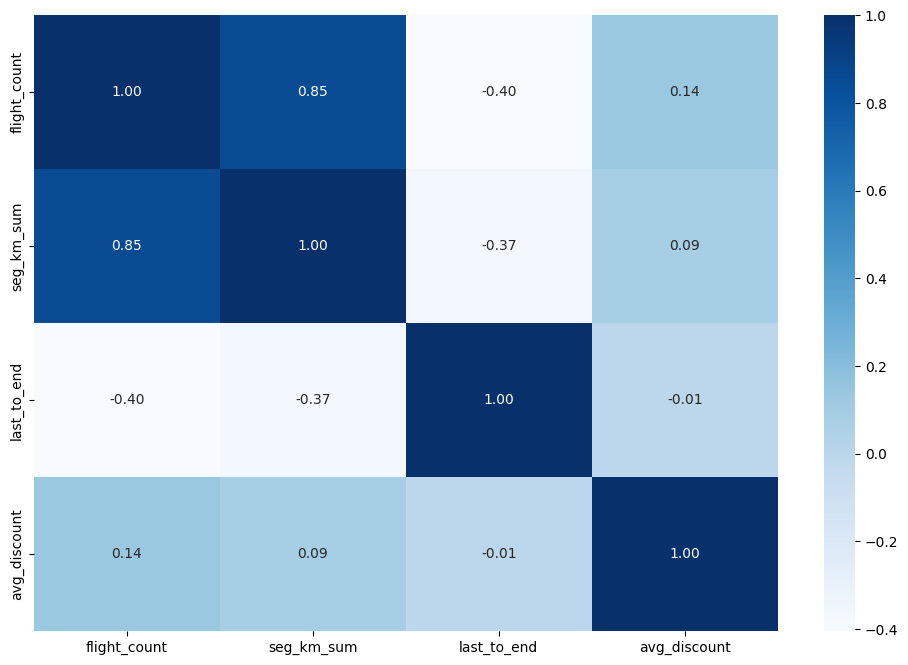

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   flight_count  60041 non-null  int64  
 1   seg_km_sum    60041 non-null  int64  
 2   last_to_end   60041 non-null  int64  
 3   avg_discount  60041 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.3 MB


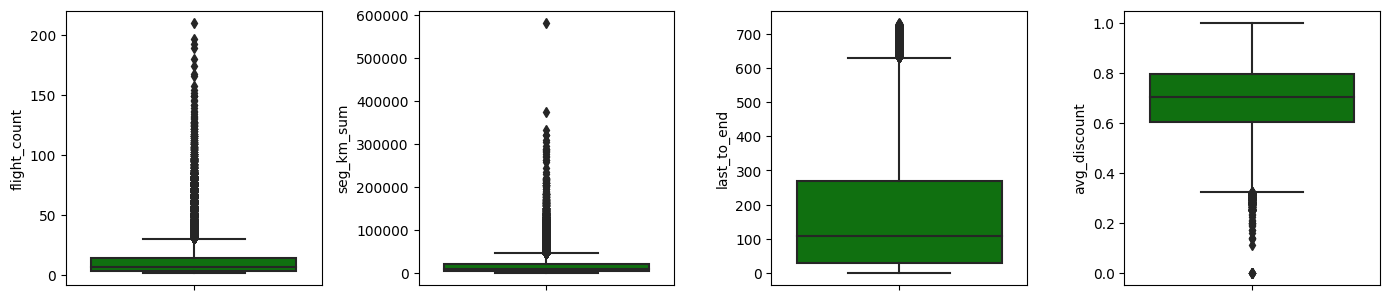

In [38]:
#Handling outliers
plt.figure(figsize = (14,6))
feats = ['flight_count', 'seg_km_sum','last_to_end',"avg_discount"]
for i in range(len(feats)):
    plt.subplot(math.ceil(len(feats)/3),4,i+1)
    sns.boxplot(y=df[feats[i]],color='g',orient='v')
    plt.tight_layout()

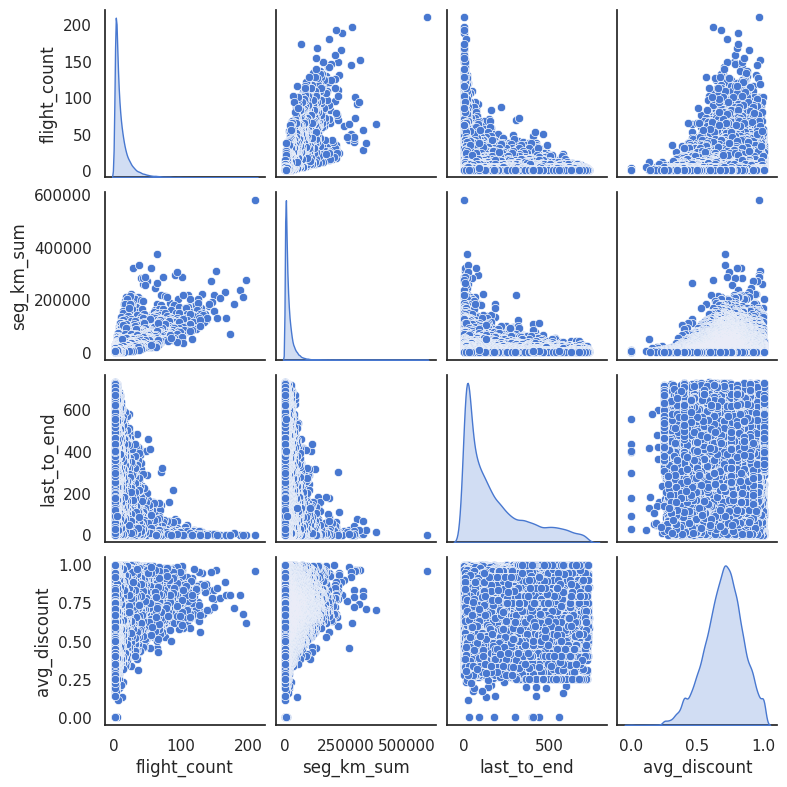

In [39]:
sns.set(style="white", palette="muted", color_codes=True)
cols = ['flight_count', 'seg_km_sum','last_to_end',"avg_discount"]
# Menggunakan pairplot untuk membuat distplot
sns.pairplot(df[cols],diag_kind='kde', height=2)
plt.show()

In [40]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
feats = ['flight_count', 'seg_km_sum','last_to_end',"avg_discount"]
fil_ent = np.array([True] * len(df))
for col in feats :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df[col] >= low_limit) & (df[col] <= high_limit)) & fil_ent

df = df[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df))

Jumlah baris sebelum memfilter outlier: 60041
Jumlah baris setelah memfilter outlier 51936


In [41]:
df=df.drop(['index'],axis=1)

In [42]:
df.describe()

,flight_count,seg_km_sum,last_to_end,avg_discount
count,51936.000000,51936.000000,51936.000000,51936.000000
mean,8.451305,12010.599334,176.819894,0.694996
std,6.618546,9550.244951,167.734939,0.140960
min,2.000000,368.000000,1.000000,0.322347
25%,3.000000,4592.000000,38.000000,0.600704
50%,6.000000,8958.500000,120.000000,0.700000
75%,12.000000,16897.000000,271.000000,0.793359
max,30.000000,45155.000000,630.000000,1.000000


In [43]:
#Standardization for all features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_cluster_std = sc.fit_transform(df)

In [44]:
df_cluster_std

array([[ 3.10474399,  3.29601009, -0.32682768,  2.0170308 ],
       [-0.21928069,  3.33108806,  1.0503584 ,  1.91207286],
       [ 3.10474399,  3.22826248,  0.26339493,  2.04639519],
       ...,
       [-0.97474084, -1.17805435,  1.07420578, -2.4474931 ],
       [-0.97474084, -1.21910082, -0.52356855,  0.10644411],
       [-0.97474084, -1.21910082, -0.33278953, -0.17732669]])

# 3. Clustering K-Means

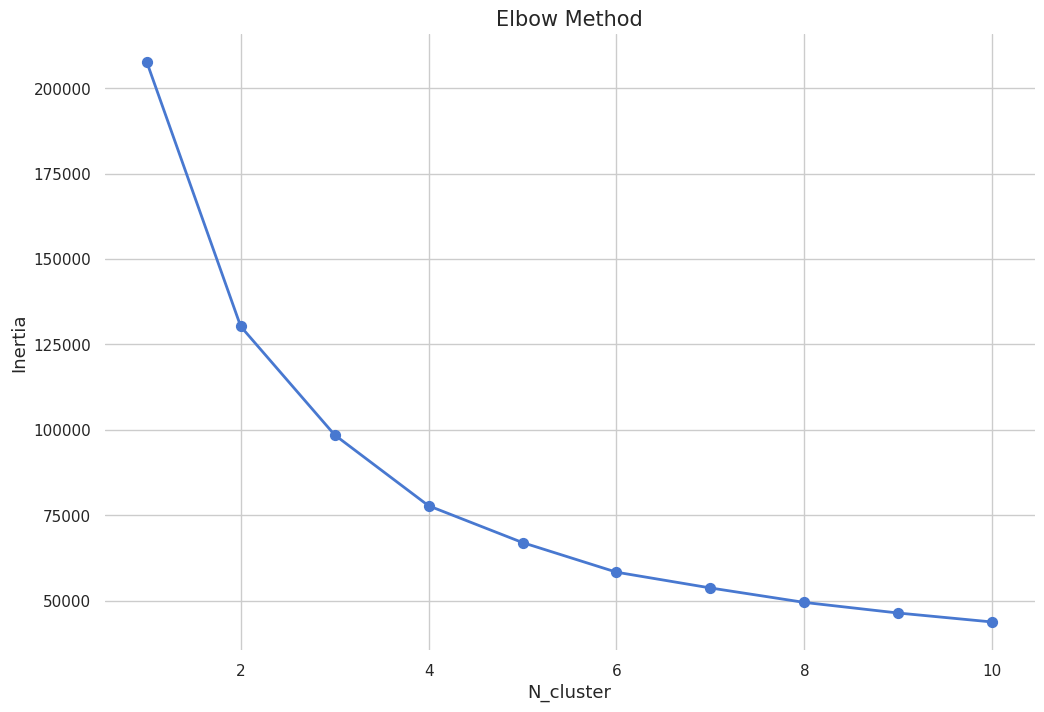

In [45]:
#Elbow method
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_cluster_std)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.scatter(range(1,11),inertia,s=50)
ax = plt.gca()
plt.plot(range(1,11),inertia,linewidth=2)
plt.title('Elbow Method',fontsize=15)
plt.grid()
ax.spines[:].set_visible(False)
plt.ylabel('Inertia',fontsize=13)
plt.xlabel('N_cluster',fontsize=13)
plt.show()

In [46]:
inertia_table = pd.DataFrame((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100, columns=['Inertia Reduction (%)'])
inertia_table

,Inertia Reduction (%)
0,37.284633
1,24.388548
2,21.074264
3,13.854341
4,12.953339
5,7.921324
6,7.889580
7,6.288137
8,5.659864
9,NaN


K-Means Clustering

In [47]:
kmeans = KMeans(n_clusters=4,random_state=42).fit(df_cluster_std)
kmeans.fit(df_cluster_std)

KMeans(n_clusters=4, random_state=42)

In [48]:
df_cluster_std = pd.DataFrame(data=df_cluster_std, columns=['flight_count',
                                                            'seg_km_sum',
                                                            'last_to_end',
                                                            'avg_discount'])
df_cluster_std

,flight_count,seg_km_sum,last_to_end,avg_discount
0,3.104744,3.296010,-0.326828,2.017031
1,-0.219281,3.331088,1.050358,1.912073
2,3.104744,3.228262,0.263395,2.046395
3,0.536179,3.383339,-0.970707,1.631907
4,1.442732,3.333392,-0.857432,1.624217
...,...,...,...,...
51931,-0.974741,-1.219101,1.437878,0.390215
51932,-0.974741,-1.219101,1.402107,0.390215
51933,-0.974741,-1.178054,1.074206,-2.447493
51934,-0.974741,-1.219101,-0.523569,0.106444


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_cluster_std)
df_pca = pca.transform(df_cluster_std)

In [50]:
df_pca = pd.DataFrame(data = df_pca, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,4.257582,-2.139509
1,1.538166,-2.042901
2,3.948119,-2.282606
3,2.958030,-1.437053
4,3.450646,-1.522560


In [51]:
# get the component variance
# Proportion of Variance (from PC1 to PC2)
pca_out = pca.fit(df_cluster_std)
pca_out.explained_variance_ratio_


array([0.53575117, 0.25359356])

In [53]:
# get the loadings pca
loadings = pca_out.components_
loadings

array([[ 0.63491388,  0.62309622, -0.45486645,  0.04161706],
       [-0.07824467,  0.00390953, -0.19334038, -0.97799897]])

In [54]:
df_cluster_std['k_label'] = kmeans.labels_
df_cluster_std

,flight_count,seg_km_sum,last_to_end,avg_discount,k_label
0,3.104744,3.296010,-0.326828,2.017031,2
1,-0.219281,3.331088,1.050358,1.912073,2
2,3.104744,3.228262,0.263395,2.046395,2
3,0.536179,3.383339,-0.970707,1.631907,2
4,1.442732,3.333392,-0.857432,1.624217,2
...,...,...,...,...,...
51931,-0.974741,-1.219101,1.437878,0.390215,1
51932,-0.974741,-1.219101,1.402107,0.390215,1
51933,-0.974741,-1.178054,1.074206,-2.447493,3
51934,-0.974741,-1.219101,-0.523569,0.106444,0


Cluster Visualization

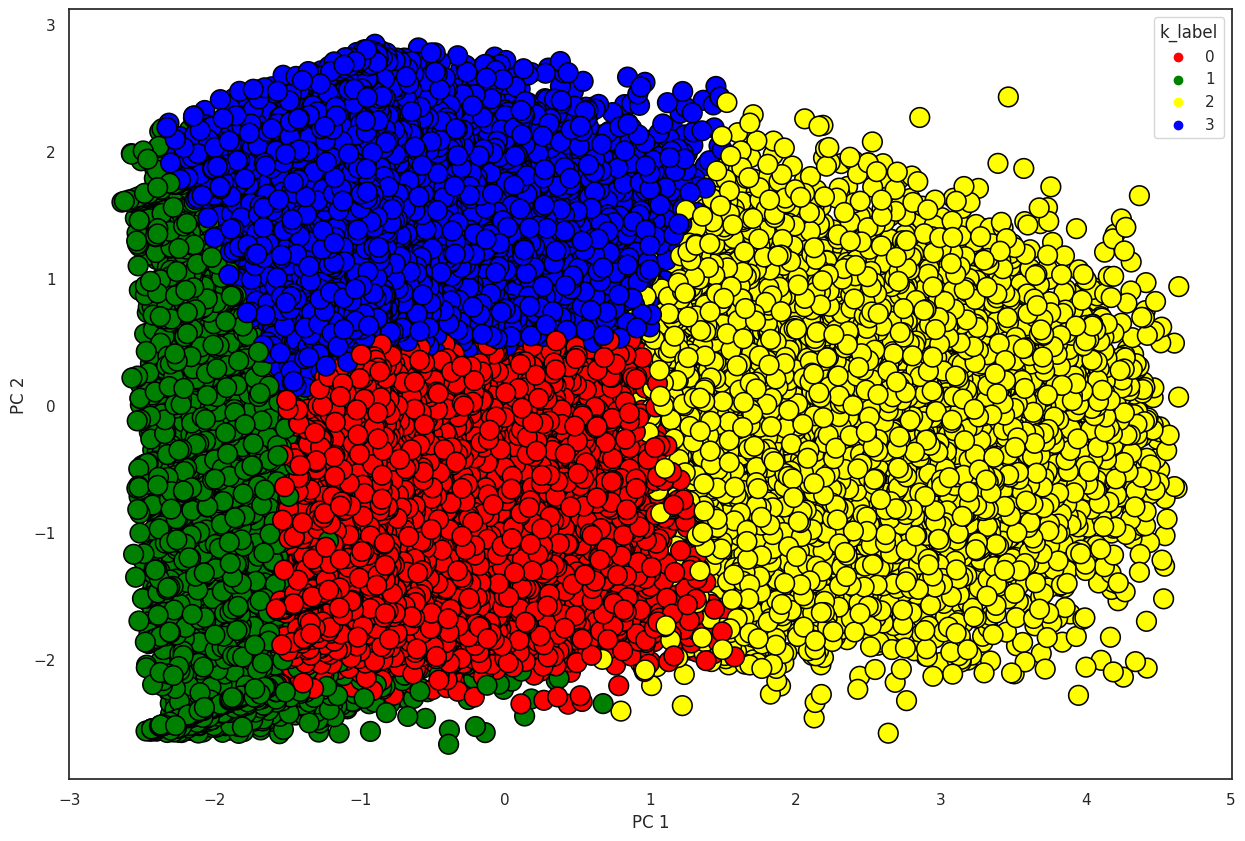

In [55]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_pca["PC 1"], y=df_pca["PC 2"], hue=df_cluster_std['k_label'],
                s=200, edgecolor='black', palette=['red','green','yellow','blue'])
plt.show()

In [56]:
df['k_label'] = kmeans.labels_
df

,flight_count,seg_km_sum,last_to_end,avg_discount,k_label
0,29,43488,122,0.979314,2
1,7,43823,353,0.964519,2
2,29,42841,221,0.983453,2
3,12,44322,14,0.925028,2
4,18,43845,33,0.923943,2
...,...,...,...,...,...
51931,2,368,418,0.750000,1
51932,2,368,412,0.750000,1
51933,2,760,357,0.350000,3
51934,2,368,89,0.710000,0


# 4. Interpretasi Cluster

In [57]:
df_cluster_interpretation = df.groupby('k_label').agg({'mean', 'median', 'std'})

In [58]:
df_cluster_interpretation


flight_count                     seg_km_sum                        \
                mean       std median          mean          std   median   
k_label                                                                     
0           6.574130  3.485227    6.0   8646.336707  4845.917036   8015.0   
1           3.835852  2.387014    3.0   5752.805925  4403.658015   4394.5   
2          18.244929  5.372717   18.0  26020.596608  7582.876961  24784.0   
3           5.409313  3.019165    5.0   8235.847694  4999.803585   7132.0   

        last_to_end                    avg_discount                      
               mean         std median         mean       std    median  
k_label                                                                  
0        112.742029   83.670316  100.0     0.789484  0.084456  0.777545  
1        457.339581   97.719618  458.0     0.734671  0.142139  0.733333  
2         68.095195   77.357947   38.0     0.706879  0.101446  0.704182  
3        145.752113  113.950540  124.0     0.539610  0.086021  0.554024

Interpretasi Cluster

Cluster 0
Cluster memiliki nilai FLIGHT COUNT dan LAST TO END yang rendah tetapi AVG_DISCOUNT tertinggi. Hal ini menunjukan bahwa cluster ini berisi pelanggan yang jarang bepergian namun masih berkemungkinan untuk bepergian lagi namun tetap memerlukan discount yang besar.

Cluster 1
Nilai FLIGHT COUNT dan SEG_KM_SUM terendah tetapi LAST TO END tertinggi. Hal ini menunjukan bahwa cluster ini berisi pelanggan yang jarang berpegian ketika harga tiket mahal. Nilai AVG_DISCOUNT cukup tinggi berarti pelanggan membeli tiket  ketika memiliki discount yang cukup besar, maka dapat disimpulkan bahwa tipe cluster ini sangat bergantung pada diskon tiket pesawat. Cluster ini adalah pelanggan yang mungkin hanya sesekali saja melakukan penerbangan pada waktu tertentu karena besarnya jarak waktu penerbangan terakhir ke pesanan penerbangan terakhir.

Cluster 2
Cluster dengan nilai FLIGHT COUNT dan SEG_KM_SUM tertinggi dan LAST TO END yang terendah. Hal ini menunjukkan bahwa cluster ini berisi pelanggan yang cukup sering bepergian dan perjalan yang dilakukan sangat jauh . Klaster ini dapat dianggap sebagai pelanggan yang sangat berharga bagi perusahaan karena mereka dapat memberikan pendapatan yang signifikan dan merupakan pelanggan setia.

Cluster 3
Cluster memiliki nilai mirip cluster 1 yakni FLIGHT COUNT dan LAST TO END yang rendah dan AVG_DISCOUNT tinggi. Cluster ini adalah pelanggan yang mungkin hanya beberapa kali saja melakukan penerbangan namun masih berkemungkinan untuk bepergian lagi karena jarak penerbangan terakhir tidak terlalu besar.





Business Recommendation

1. Menargetkan Pelanggan Cluster 2: Pelanggan yang termasuk dalam klaster 2 adalah pelanggan yang sering bepergian dengan jarak yang sangat jauh. Perusahaan dapat mempertahankan pelanggan ini dengan memberikan penawaran khusus, program loyalitas, atau bonus untuk meningkatkan loyalitas mereka. Hal ini akan membantu perusahaan untuk mempertahankan pelanggan yang menghasilkan pendapatan yang signifikan bagi bisnis.

2. Pemberian promo: Pemberian promo dapat dilakukan untuk pelanggan Cluster 0 dan 3 karena pelanggan pada cluster ini sering melakukan perjalanan jauh namun tidak sering melakukan perjalanan, dengan adanya promo yang diberikan diharapkan akan membuat pelanggan pada cluster ini lebih tertarik melakukan perjalanan.

4. Mengembangkan Strategi Pemasaran yang Berbeda: Setiap klaster memiliki karakteristik yang berbeda. Oleh karena itu, perusahaan dapat mengembangkan strategi pemasaran yang berbeda untuk masing-masing klaster. Dengan demikian, perusahaan dapat menargetkan pelanggan dengan lebih efektif dan meningkatkan keuntungan bisnis secara keseluruhan.
